# 开始快速搭建

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


#  制造数据集
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)  # torch.unsqueeze()将维度为(100,)的数据转换为(100,1)
print(x.shape)
y=x.pow(2)+0.2*torch.rand(x.size())  # torch.rand(x)用于生成一个x数量的张量,或者输入一个(n,m)的元组,即随机生成这样的一个张量
print(y.shape)
x,y=Variable(x),Variable(y)

torch.Size([100, 1])
torch.Size([100, 1])


In [2]:
# 建立神经网络的方式不同之前,快速搭建的方式
net=torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)

In [3]:
net

Sequential(
  (0): Linear(in_features=1, out_features=10)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1)
)

In [4]:
# 迭代训练神经网络
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)  #optimizer是训练的工具,分别传入了神经网络中的所有参数,以及学习率
loss_func=torch.nn.MSELoss()  # 损失函数,计算均方差

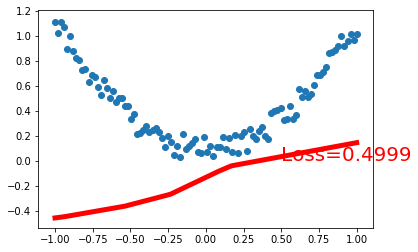

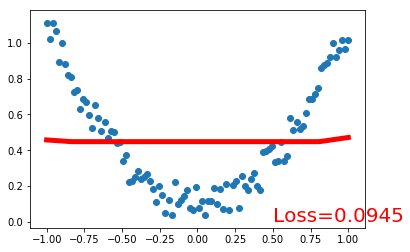

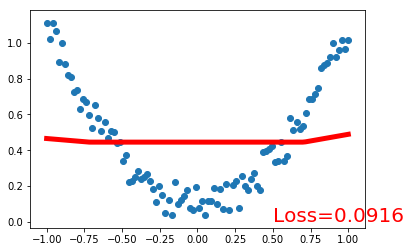

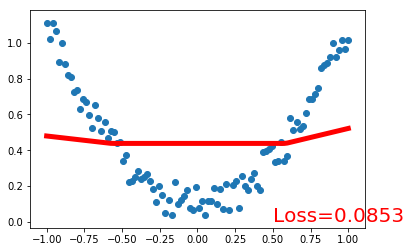

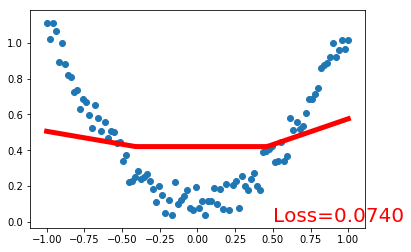

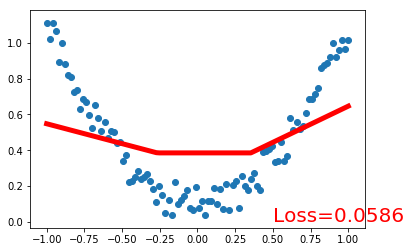

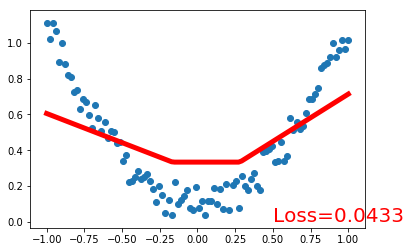

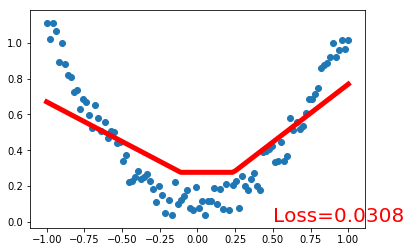

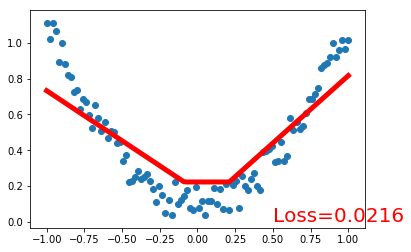

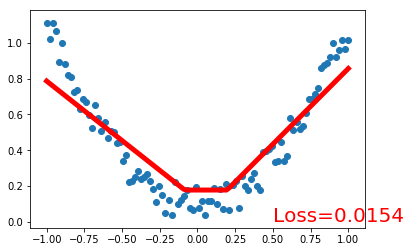

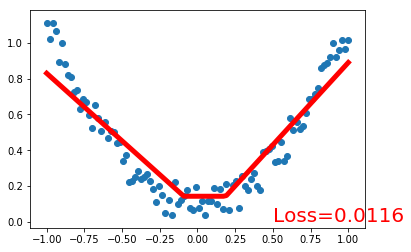

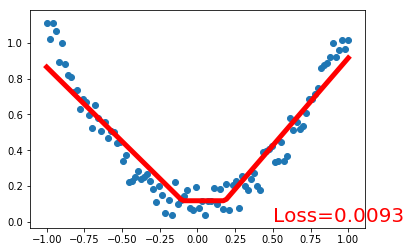

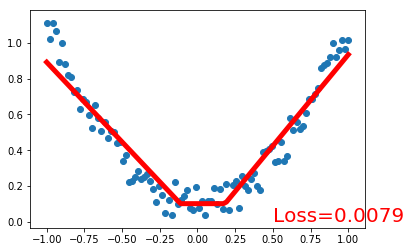

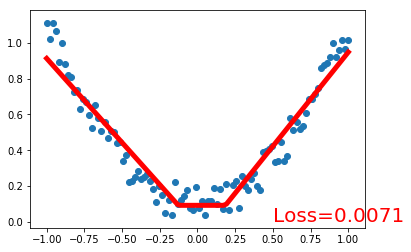

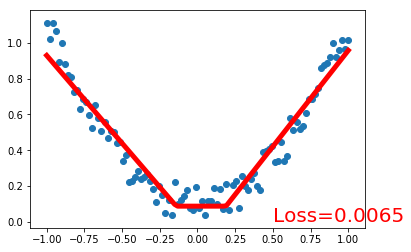

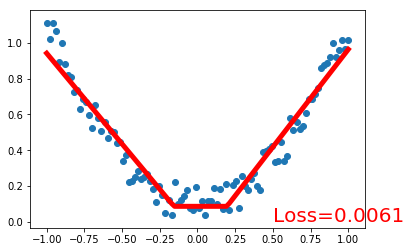

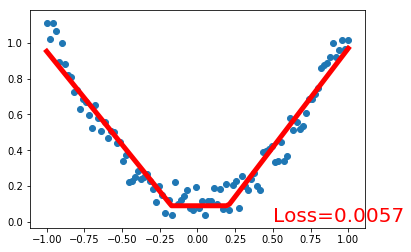

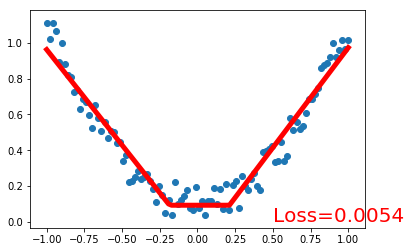

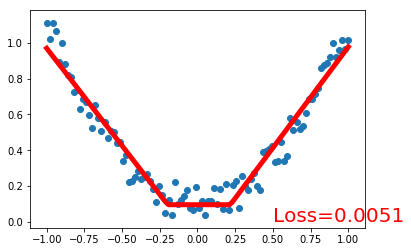

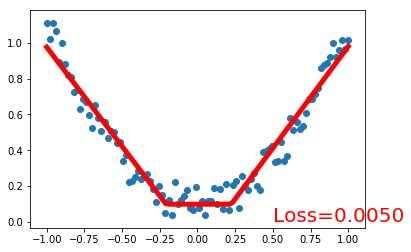

In [5]:
plt.ion()   # 画图
for t in range(100):
    prediction=net(x) # 输入训练数据x,输出预测值,执行一次只正向传播一次
    loss=loss_func(prediction,y)  # 损失函数输入yhat与y,得到误差
    
    optimizer.zero_grad()  # 清空上一步的更新参数值
    loss.backward() # 误差反向传播
    optimizer.step()  # 将参数更新值施加到net上
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)    
        
plt.ioff()
plt.show()